## EDA & Data Wrangling

In [1]:
#imports

from __future__ import print_function
print('Print is ready to serve')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Print is ready to serve


In [2]:
# read data
df = pd.read_csv('../data/int_online_tx.csv')

In [3]:
df.shape

(35116, 8)

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France


In [5]:
df.columns

Index([u'InvoiceNo', u'StockCode', u'Description', u'Quantity', u'InvoiceDate',
       u'UnitPrice', u'CustomerID', u'Country'],
      dtype='object')

In [6]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
#categorical types
df.dtypes[df.dtypes == 'object']

StockCode      object
Description    object
InvoiceDate    object
Country        object
dtype: object

In [9]:
print(len(df.Description.unique()))

2669


In [11]:
print(len(df.InvoiceDate.unique()))
print(len(df.Country.unique()))

1577
37


In [12]:
print(len(df.StockCode.unique()))

2602


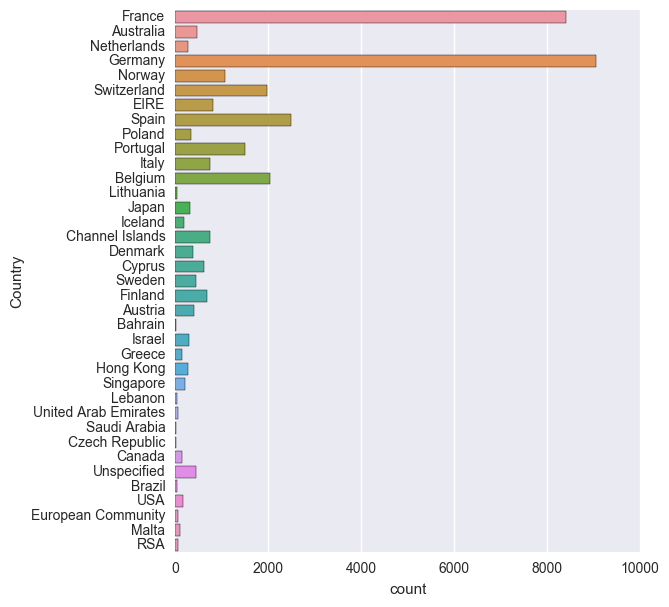

In [14]:
# country wise plot

# Make figsize 6x7
plt.figure(figsize=(6,7))

sns.countplot(y='Country', data=df)

## Transaction Level Cleaning

In [17]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [19]:
## without customer id, we can't do much.
## so drop them.

df = df[df.CustomerID.isnull() == False]

In [20]:
df.shape

(33698, 8)

In [30]:
#df.dtypes(exclude=['object']).index
?df.dtypes

TypeError: 'Series' object is not callable

In [31]:
# change customer ID from float to int
df['CustomerID'] = df.CustomerID.astype(int)

In [32]:
df.CustomerID.head(5)

0    12583
1    12583
2    12583
3    12583
4    12583
Name: CustomerID, dtype: int64

In [34]:
df.to_csv('cleaned_transactions.csv', index=None)